<a href="https://colab.research.google.com/github/Cherow/Mercy_Cherotich_week6core_independentproject/blob/main/Mercy_cherotich_week6_datasciencecore_independentproject_moringaSchool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WEEK 6 INDEPENDENT PROJECT

## 1. Defining the Question

### a) Specifying the Question

As a football analyst of Mchezo pesa ltd have been tasked to make predictions of a game result between Team A and Team B based on who is at home and who is away, and on whether the game is friendly.
There are two possible approaches
1. Polynomial Approach
what needs to be trained
a.Rank of home team
b.Rank of away team
c.Tournament type
and the models are:      
    1. Predict how many goals for the home team scores
    2. predict how many goals for the away team scores
2. Logistc Aprrroach

      Feature engineering: figure out from the home  teams perspective if it is a win(W),lose(L) or draw(D)
      



### b) Defining the Metric for Success

Being able to predict the goals for the home team and away team scores  and being able to figure out from home perspective if it is a win,lose or draw

### c) Understanding the context 

people need to be able to predict the outcome of football as it is neccessary before placing a bet to determine the chances of winning and also to the football club can use this to improve their performance

### d) Recording the Experimental Design

we used the CRISP-DM design

### e) Data Relevance

the data was relevant and up to date

## 2. Reading the Data

In [377]:
# Loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import KFold
import scipy as sp
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [378]:
#loading the dataset 
Fifa_df = pd.read_csv('/content/fifa_ranking.csv')
Results_df = pd.read_csv('/content/results.csv')

## 3. Checking the Data

In [379]:
# Determining the no. of records in our dataset
#
print(Fifa_df.shape)
print(Results_df.shape)

(57793, 16)
(40839, 9)


In [380]:
# Previewing the top of our dataset
#
print(Fifa_df.head())
print(Results_df.head())

   rank country_full  ... confederation   rank_date
0     1      Germany  ...          UEFA  1993-08-08
1     2        Italy  ...          UEFA  1993-08-08
2     3  Switzerland  ...          UEFA  1993-08-08
3     4       Sweden  ...          UEFA  1993-08-08
4     5    Argentina  ...      CONMEBOL  1993-08-08

[5 rows x 16 columns]
         date home_team away_team  ...     city   country neutral
0  1872-11-30  Scotland   England  ...  Glasgow  Scotland   False
1  1873-03-08   England  Scotland  ...   London   England   False
2  1874-03-07  Scotland   England  ...  Glasgow  Scotland   False
3  1875-03-06   England  Scotland  ...   London   England   False
4  1876-03-04  Scotland   England  ...  Glasgow  Scotland   False

[5 rows x 9 columns]


In [381]:
# Previewing the bottom of our dataset
# 
print(Fifa_df.tail())
print(Results_df.tail())

       rank country_full  ... confederation   rank_date
57788   206     Anguilla  ...      CONCACAF  2018-06-07
57789   206      Bahamas  ...      CONCACAF  2018-06-07
57790   206      Eritrea  ...           CAF  2018-06-07
57791   206      Somalia  ...           CAF  2018-06-07
57792   206        Tonga  ...           OFC  2018-06-07

[5 rows x 16 columns]
             date         home_team  ... country  neutral
40834  2019-07-18    American Samoa  ...   Samoa     True
40835  2019-07-18              Fiji  ...   Samoa     True
40836  2019-07-19           Senegal  ...   Egypt     True
40837  2019-07-19        Tajikistan  ...   India     True
40838  2019-07-20  Papua New Guinea  ...   Samoa     True

[5 rows x 9 columns]


In [382]:
# Checking whether each column has an appropriate datatype
#
print(Fifa_df.info())
print(Results_df.info())
#the rank_date and the date have the wrong format and needs to be correct

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [383]:
#checking for unique value
print(Results_df.nunique())
print(Fifa_df.nunique())

date          15115
home_team       309
away_team       306
home_score       26
away_score       22
tournament      109
city           1960
country         266
neutral           2
dtype: int64
rank                         209
country_full                 216
country_abrv                 216
total_points               11114
previous_points             1557
rank_change                  121
cur_year_avg                7419
cur_year_avg_weighted       7419
last_year_avg               7473
last_year_avg_weighted      7001
two_year_ago_avg            7575
two_year_ago_weighted       6513
three_year_ago_avg          7628
three_year_ago_weighted     5849
confederation                  6
rank_date                    286
dtype: int64


## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

## 5. Tidying the Dataset

In [384]:
# The results consist of games since 1872 and since there is ranking only since 1993 we remove results prior 1993/08/08 and there is no
#no ranking for games past 07/06/2018
Results_df1 = Results_df[Results_df['date'] > '1993-08-08']
Results_df2  = Results_df1[Results_df1['date']< '2018-07-06']
Results_df1.shape
Results_df2.tail()


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
39914,2018-07-02,Brazil,Mexico,2,0,FIFA World Cup,Samara,Russia,True
39915,2018-07-02,Belgium,Japan,3,2,FIFA World Cup,Rostov-on-Don,Russia,True
39916,2018-07-03,Sweden,Switzerland,1,0,FIFA World Cup,St. Petersburg,Russia,True
39917,2018-07-03,Colombia,England,1,1,FIFA World Cup,Moscow,Russia,True
39918,2018-07-05,Malaysia,Fiji,1,0,Friendly,Kuala Lumpur,Malaysia,False


In [385]:
# we wont need the city ,neutral  column so we drop
#
Results_df =Results_df2.drop(['city','neutral'],axis = 1)
Results_df.head()

,date,home_team,away_team,home_score,away_score,tournament,country
17922,1993-08-09,Guinea,Sierra Leone,4,0,Friendly,Guinea
17923,1993-08-11,Faroe Islands,Norway,0,7,Friendly,Faroe Islands
17924,1993-08-11,Sweden,Switzerland,1,2,Friendly,Sweden
17925,1993-08-15,Australia,Canada,2,1,FIFA World Cup qualification,Australia
17926,1993-08-15,Bolivia,Ecuador,1,0,FIFA World Cup qualification,Bolivia


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


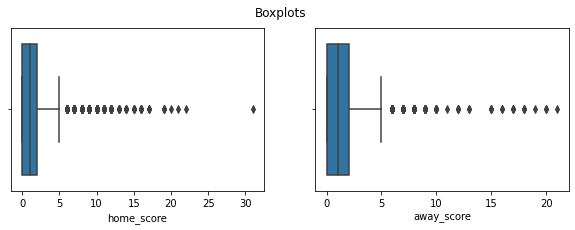

In [386]:
# Identifying outliers in our data
fig,(ax1,ax2)=plt.subplots(1,2,figsize= (10,3))
fig.suptitle('Boxplots')
sns.boxplot(Results_df['home_score'],ax=ax1)
sns.boxplot(Results_df['away_score'],ax = ax2)
#our data contain some ouliers but we wont remove them because some teams may have scored high score

In [387]:
# checking with the Missing Data
#
Results_df.isnull().sum()
#our data has no missing values

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
country       0
dtype: int64

In [388]:
#checking duplicates in our data
duplicated = Results_df.duplicated().sum()
print(duplicated)
#checking the duplicates
duplicate = Results_df[Results_df.duplicated(keep='first')]
duplicate
#it has one duplicated so we drop the duplicates
Results_df1 = Results_df.drop_duplicates()
Results_df1.duplicated().sum()
Results_df1.head()

1


,date,home_team,away_team,home_score,away_score,tournament,country
17922,1993-08-09,Guinea,Sierra Leone,4,0,Friendly,Guinea
17923,1993-08-11,Faroe Islands,Norway,0,7,Friendly,Faroe Islands
17924,1993-08-11,Sweden,Switzerland,1,2,Friendly,Sweden
17925,1993-08-15,Australia,Canada,2,1,FIFA World Cup qualification,Australia
17926,1993-08-15,Bolivia,Ecuador,1,0,FIFA World Cup qualification,Bolivia


In [389]:
#converting date column to datetime
Results_df1['date'] = Results_df['date'].astype('datetime64[ns]')
Results_df1.info()
#obtaining the year
Results_df1['year'] = pd.DatetimeIndex(Results_df1['date']).year
Results_df1.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21996 entries, 17922 to 39918
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        21996 non-null  datetime64[ns]
 1   home_team   21996 non-null  object        
 2   away_team   21996 non-null  object        
 3   home_score  21996 non-null  int64         
 4   away_score  21996 non-null  int64         
 5   tournament  21996 non-null  object        
 6   country     21996 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 1.3+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,date,home_team,away_team,home_score,away_score,tournament,country,year
17922,1993-08-09,Guinea,Sierra Leone,4,0,Friendly,Guinea,1993
17923,1993-08-11,Faroe Islands,Norway,0,7,Friendly,Faroe Islands,1993
17924,1993-08-11,Sweden,Switzerland,1,2,Friendly,Sweden,1993
17925,1993-08-15,Australia,Canada,2,1,FIFA World Cup qualification,Australia,1993
17926,1993-08-15,Bolivia,Ecuador,1,0,FIFA World Cup qualification,Bolivia,1993


In [390]:
# the Fifa results has columns we wont need so we will drop them
Fifa_df.head()
#we only need the Rank and country_full column
#Fifa_df1 = Fifa_df[['rank','country_full']]
                    #'rank_date',]]
Fifa_df1.head()
#renaming the country full to country
Fifa_df= Fifa_df1.rename(columns = {'country_full':'country'})
Fifa_df.head()
#Fifa_df.shape


,rank,country
0,1,Germany
1,2,Italy
2,3,Switzerland
3,4,Sweden
4,5,Argentina


In [391]:
#we merge the two datasets
Home = pd.merge(Results_df1,Fifa_df,how = 'left')
Home.head(50)

#there are duplicates in the date column hence we drop the duplicates
Home_team = Home.drop_duplicates(subset=['date','home_team','away_team'],keep ='first')
Home_team.head(50)
#we drop the nan values
Home_team1 = Home_team.dropna()
Home_team1.head()
#we rename rank to home team rank
Home_team1 = Home_team1.rename(columns={'rank':'Home_team_rank'})
Home_team1.head()
Home_reset=Home_team1.reset_index()
Home_reset
#we drop the index column
Home_team1 = Home_reset.drop(['index'],axis=1)
Home_team1
#we now get the away team rank
#change the away_team to country drop the country and merge the dataset
Results_df = Results_df1.drop(['country'],axis=1)
Results_df2=Results_df.rename(columns = {'away_team':'country'})
Results_df2.head()
Home_df = pd.merge(Results_df2,Fifa_df,how ='left')
Home_df.head()
#droping the duplicates in the datasets 
Away_team = Home_df.drop_duplicates(subset=['date','home_team','country'],keep ='first')
Away_team.shape
#we then drop the nan values
Away_Team = Away_team.dropna()
Away_Team.head()
#we rename the rank to away team rank
Away_Team1 = Away_Team.rename(columns={'rank':'Away_team_rank'})
Away_Team1.head()

#we now combine the away team rank and home team rank
Away = Away_Team1.iloc[:,-1]
Away.shape
#we reset the indices
Away_reset=Away.reset_index()
#dropping the index column
Away =Away_reset.drop(['index'],axis =1)
Away
df = pd.concat([Home_team1,Away],axis =1)
df.head(50)
#checking for nan values
df.isna().sum()
#we drop the nan values
df1 = df.dropna()
df1.head()

#we drop the date and country column
df = df1.drop(['country','date'],axis=1)
df.head()
#df.shape


,home_team,away_team,home_score,away_score,tournament,year,Home_team_rank,Away_team_rank
0,Guinea,Sierra Leone,4,0,Friendly,1993,65.0,86.0
1,Faroe Islands,Norway,0,7,Friendly,1993,111.0,9.0
2,Sweden,Switzerland,1,2,Friendly,1993,4.0,3.0
3,Australia,Canada,2,1,FIFA World Cup qualification,1993,52.0,46.0
4,Bolivia,Ecuador,1,0,FIFA World Cup qualification,1993,59.0,35.0


In [392]:
#changing the year column to datetime
df.info()
df['year'] = df['year'].astype('datetime64[ns]')
#df['year']= pd.to_datetime(df['year'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19510 entries, 0 to 19509
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   home_team       19510 non-null  object 
 1   away_team       19510 non-null  object 
 2   home_score      19510 non-null  int64  
 3   away_score      19510 non-null  int64  
 4   tournament      19510 non-null  object 
 5   year            19510 non-null  int64  
 6   Home_team_rank  19510 non-null  float64
 7   Away_team_rank  19510 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.3+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 19510 entries, 0 to 19509
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   home_team       19510 non-null  object        
 1   away_team       19510 non-null  object        
 2   home_score      19510 non-null  int64         
 3   away_sc

## 6. Exploratory Analysis

Univariate analysis

In [417]:
#we find the frequency table for the categorical value
home_team = df['home_team'].value_counts()
home_team
away_team = df['away_team'].value_counts()
away_team
tournament =df['tournament'].value_counts()
tournament
#the friendly tournament was the leading with 7124 and the least was copa with 2


278    201
118    168
95     166
87     164
191    164
      ... 
273      2
6        1
276      1
237      1
36       1
Name: away_team, Length: 282, dtype: int64


30    7124
28    4376
59    1459
7      984
2      455
      ... 
21       4
47       4
23       4
34       2
19       2
Name: tournament, Length: 68, dtype: int64

In [394]:
#univariate summaries
df.describe()

,home_score,away_score,Home_team_rank,Away_team_rank
count,19510.000000,19510.000000,19510.000000,19510.000000
mean,1.646438,1.089800,75.163506,82.427114
std,1.689931,1.328133,50.332620,53.013029
min,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,33.000000,39.000000
50%,1.000000,1.000000,69.000000,77.000000
75%,2.000000,2.000000,111.000000,125.000000
max,31.000000,21.000000,207.000000,207.000000


In [395]:
#finding the skweness
df.skew()
#the home score and away score are higly skwed to the right as they have skweness greater than 2
#the home rank and away rank are moderately skewed to the right as they have skweness less than 0.5

home_score        2.380970
away_score        2.825061
Home_team_rank    0.386291
Away_team_rank    0.326461
dtype: float64

In [396]:
#finding the median
df.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


home_score         1.0
away_score         1.0
Home_team_rank    69.0
Away_team_rank    77.0
dtype: float64

In [397]:
#finding the mode
df.mode()

,home_team,away_team,home_score,away_score,tournament,year,Home_team_rank,Away_team_rank
0,Japan,Zambia,1,0,Friendly,1970-01-01 00:00:00.000002008,12.0,67.0


In [398]:
#finding kurtosis
df.kurt()
#the home score and away score are leptokurtic as they have high kurtosis
#the home rank and away rank are platykurtic has they have low kurtosis

home_score        14.261052
away_score        20.161502
Home_team_rank    -0.821694
Away_team_rank    -0.942541
dtype: float64

Bivariate Analysis


In [399]:
#encoding the categorical data using labelencoder
en = LabelEncoder()
df['away_team'] = en.fit_transform(df['away_team'])
df['away_team']
df['home_team'] = en.fit_transform(df['home_team'])
df['home_team']
df['tournament']=en.fit_transform(df['tournament'])
df['tournament']

0        30
1        30
2        30
3        28
4        28
         ..
19505    15
19506    15
19507    15
19508    15
19509    15
Name: tournament, Length: 19510, dtype: int64

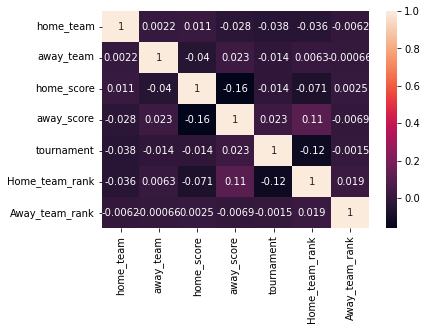

In [400]:
#correlation matrix
matrix = df.corr()
matrix
#visualising correlation using heatmap
sns.heatmap(matrix,annot=True)
#our variables are not highly correlated hence no or very little multicollinearity

In [401]:
#finding the VIF of the variables
pd.DataFrame(np.linalg.inv(matrix.values), index = matrix.index, columns=matrix.columns)
#no variables has a VIF greater than 5 hence no multicollinearity

,home_team,away_team,home_score,away_score,tournament,Home_team_rank,Away_team_rank
home_team,1.003684,-0.002520,-0.004197,0.022843,0.042054,0.038143,0.005688
away_team,-0.002520,1.002122,0.037338,-0.017562,0.015297,-0.000066,0.000453
home_score,-0.004197,0.037338,1.031738,0.159373,0.017967,0.058495,-0.002596
away_score,0.022843,-0.017562,0.159373,1.038382,-0.033942,-0.101452,0.008810
tournament,0.042054,0.015297,0.017967,-0.033942,1.019051,0.131668,-0.001002
Home_team_rank,0.038143,-0.000066,0.058495,-0.101452,0.131668,1.032807,-0.020492
Away_team_rank,0.005688,0.000453,-0.002596,0.008810,-0.001002,-0.020492,1.000500


## 7. Implementing the Solution

Feature Engineering

In [402]:
df.head()

,home_team,away_team,home_score,away_score,tournament,year,Home_team_rank,Away_team_rank
0,109,220,4,0,30,1970-01-01 00:00:00.000001993,65.0,86.0
1,86,181,0,7,30,1970-01-01 00:00:00.000001993,111.0,9.0
2,242,239,1,2,30,1970-01-01 00:00:00.000001993,4.0,3.0
3,16,44,2,1,28,1970-01-01 00:00:00.000001993,52.0,46.0
4,31,73,1,0,28,1970-01-01 00:00:00.000001993,59.0,35.0


In [403]:
# Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

def result(row):
  if row['home_score'] > row['away_score']:
    outcome = 'Win'
  elif row['home_score'] < row['away_score']:
    outcome = 'Lose'
  else:
    outcome = 'Draw'
  return outcome

df['status'] = df.apply(result, axis=1)
df.head()


,home_team,away_team,home_score,away_score,tournament,year,Home_team_rank,Away_team_rank,status
0,109,220,4,0,30,1970-01-01 00:00:00.000001993,65.0,86.0,Win
1,86,181,0,7,30,1970-01-01 00:00:00.000001993,111.0,9.0,Lose
2,242,239,1,2,30,1970-01-01 00:00:00.000001993,4.0,3.0,Lose
3,16,44,2,1,28,1970-01-01 00:00:00.000001993,52.0,46.0,Win
4,31,73,1,0,28,1970-01-01 00:00:00.000001993,59.0,35.0,Win


In [404]:
#we encode the status column using labelencoder
df['status'] = en.fit_transform(df['status'])
df.head()

,home_team,away_team,home_score,away_score,tournament,year,Home_team_rank,Away_team_rank,status
0,109,220,4,0,30,1970-01-01 00:00:00.000001993,65.0,86.0,2
1,86,181,0,7,30,1970-01-01 00:00:00.000001993,111.0,9.0,1
2,242,239,1,2,30,1970-01-01 00:00:00.000001993,4.0,3.0,1
3,16,44,2,1,28,1970-01-01 00:00:00.000001993,52.0,46.0,2
4,31,73,1,0,28,1970-01-01 00:00:00.000001993,59.0,35.0,2


## Model 1 : predict game results between team A and B ,based on who is at home,who is away  and whether the game is friendly or not

## a.Polynomial Approach

1.making prediction for the home score

In [405]:
#we drop the columns we are not using for prediction
#the columns we need for predictions are tournament ,home team rank and away team rank to predict the home score
df_poly = df.drop(['home_team','away_team','away_score','year','status'],axis =1)
df_poly
#we split data into label and features
X = df_poly.drop(['home_score'],axis = 1)
print(X.head())
Y = df_poly['home_score']
#we the get the test and train set .the test size is 30% the dataset
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size= 0.30,random_state=0)

   tournament  Home_team_rank  Away_team_rank
0          30            65.0            86.0
1          30           111.0             9.0
2          30             4.0             3.0
3          28            52.0            46.0
4          28            59.0            35.0


In [406]:
#fitting a polynomial model using degree four
poly_reg = PolynomialFeatures(degree = 4) 
X_poly = poly_reg.fit_transform(X_train)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, Y_train)
#making prediction
Y_predict = pol_reg.predict(poly_reg.fit_transform(X_test))
comparison = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_predict})
comparison.describe()
#our model is not bad since the difference in the minimum value is not very large

,Actual,Predicted
count,5853.000000,5853.000000
mean,1.673159,1.642585
std,1.721847,0.208186
min,0.000000,0.428752
25%,1.000000,1.479036
50%,1.000000,1.622126
75%,2.000000,1.791419
max,31.000000,2.654721


In [407]:
#finding the RMSE to check accuracy
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_predict)))
#the RMSE is 1.72 which is low  hence our model is not bad

Root Mean Squared Error: 1.7204772968412816


Cross Validating the model


In [408]:
folds = KFold(n_splits=10)
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 10 folds, we will end up with 70% of our data in the training set, and 30% in the test set, just as above

  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, Y_train)
  
  # assess the accuraccy of the model
  Y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1
  
  #we have used 10 folds and our RMSE is not far from it

we are using 10 folds

Training model 1
Model 1 Root Mean Squared Error: 1.7211454615073007

Training model 2
Model 2 Root Mean Squared Error: 1.7211454615073007

Training model 3
Model 3 Root Mean Squared Error: 1.7211454615073007

Training model 4
Model 4 Root Mean Squared Error: 1.7211454615073007

Training model 5
Model 5 Root Mean Squared Error: 1.7211454615073007

Training model 6
Model 6 Root Mean Squared Error: 1.7211454615073007

Training model 7
Model 7 Root Mean Squared Error: 1.7211454615073007

Training model 8
Model 8 Root Mean Squared Error: 1.7211454615073007

Training model 9
Model 9 Root Mean Squared Error: 1.7211454615073007

Training model 10
Model 10 Root Mean Squared Error: 1.7211454615073007


In [409]:
np.mean(RMSES)
#it is not far from the RMSE we used above
#we can therefore pick any model since they all have the same RMSE and it is not far from what we obtained above using 
#the polynomial of degree 4

1.721145461507301

checking heteroscedasticity using Bartlett’s test

In [410]:
residuals = np.subtract(Y_predict, Y_test)

pd.DataFrame(residuals).describe()

,home_score
count,5853.000000
mean,-0.030574
std,1.720353
min,-29.323283
25%,-0.562575
50%,0.450465
75%,1.033068
max,2.480234


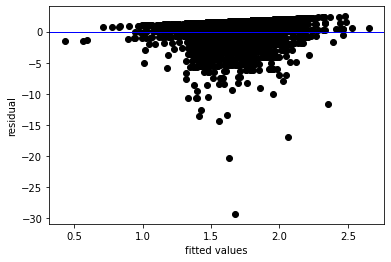

In [411]:

plt.scatter(Y_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='blue', linewidth=1)
plt.show()
#the residuals are centred around the mean and this show that our model is faily good

In [412]:
test_result, p_value = sp.stats.bartlett(Y_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(Y_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)


# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')
#from the test we conclude that the variance are homogeneous

the variances are homogeneous!


2.making prediction for the away score

In [413]:
#we drop the columns we are not using for prediction
#the columns we need for predictions are tournament ,home team rank and away team rank to predict the away score
df_poly = df.drop(['home_team','away_team','home_score','year','status'],axis =1)
df_poly
#we split data into label and features
X = df_poly.drop(['away_score'],axis = 1)
Y = df_poly['away_score']
#we the get the test and train set .the test size is 30% the dataset
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size= 0.30,random_state=0)

In [414]:
#fitting a polynomial model using degree four
poly_reg = PolynomialFeatures(degree = 4) 
X_poly = poly_reg.fit_transform(X_train)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, Y_train)
#making prediction
Y_predict = pol_reg.predict(poly_reg.fit_transform(X_test))
comparison = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_predict})
comparison.describe()
#our model is not bad since the difference in the minimum value is not very large

,Actual,Predicted
count,5853.000000,5853.000000
mean,1.097215,1.080235
std,1.352176,0.190426
min,0.000000,0.541554
25%,0.000000,0.941182
50%,1.000000,1.026692
75%,2.000000,1.184897
max,20.000000,3.177469


In [415]:
#finding the RMSE to check accuracy
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_predict)))
#the RMSE is 1.35 which is low  hence our model is not bad

Root Mean Squared Error: 1.350311676723072


Cross validating the model

In [337]:
folds = KFold(n_splits=10)
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 10 folds, we will end up with 70% of our data in the training set, and 30% in the test set, just as above

  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, Y_train)
  
  # assess the accuraccy of the model
  Y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1
  
  #we have used 10 folds and our RMSE is not far from it

we are using 10 folds

Training model 1
Model 1 Root Mean Squared Error: 1.350063900588996

Training model 2
Model 2 Root Mean Squared Error: 1.350063900588996

Training model 3
Model 3 Root Mean Squared Error: 1.350063900588996

Training model 4
Model 4 Root Mean Squared Error: 1.350063900588996

Training model 5
Model 5 Root Mean Squared Error: 1.350063900588996

Training model 6
Model 6 Root Mean Squared Error: 1.350063900588996

Training model 7
Model 7 Root Mean Squared Error: 1.350063900588996

Training model 8
Model 8 Root Mean Squared Error: 1.350063900588996

Training model 9
Model 9 Root Mean Squared Error: 1.350063900588996

Training model 10
Model 10 Root Mean Squared Error: 1.350063900588996


In [338]:
np.mean(RMSES)
#the mean RMSE is not far from what we used with polynomial of order 4
#we can pick any model since they all have the same RMSE and not far from the one above

1.350063900588996

checking heteroscedasticity using Bartlett’s test

In [339]:
residuals = np.subtract(Y_predict, Y_test)

pd.DataFrame(residuals).describe()

,away_score
count,5853.000000
mean,-0.016980
std,1.350320
min,-19.134899
25%,-0.756353
50%,0.121412
75%,0.962413
max,2.402352


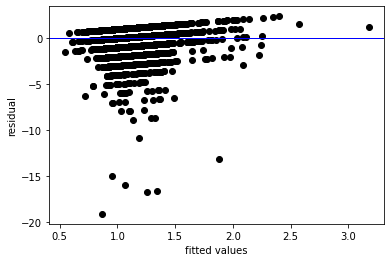

In [340]:
plt.scatter(Y_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='blue', linewidth=1)
plt.show()
#our residuals are centered round the mean


In [341]:
test_result, p_value = sp.stats.bartlett(Y_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(Y_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)


# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')
#from the test we conclude that the variance are homogeneous

the variances are homogeneous!


#Model 2: from home perspective we predict if game is a win,lose or draw
# b.Logistic approach 


In [342]:
df.head()
#we are going to drop home_team,away_team,tournament and year since we wont need them to make prediction
X = df.drop(['home_team','away_team','tournament','year','status'],axis =1)
X.head()
Y = df['status']
#we now split data into test and train test = 30%
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size= 0.3,random_state=0)

In [358]:
#we then train our model using logistic regression
LogReg = LogisticRegression()
LogReg.fit(X_train,Y_train)
#we then do prediction
Y_pred = LogReg.predict(X_test)
Y_predict = pd.DataFrame(Y_pred)
Y_test1 = pd.DataFrame(Y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


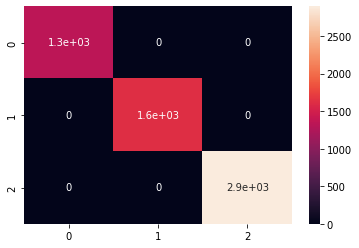

In [375]:
#checking the accuracy using confusion matrix
confusion_matrix = confusion_matrix(Y_test1,Y_predict)
confusion_matrix
#using heatmap
sns.heatmap(confusion_matrix,annot=True)
#from our prediction our model made accurate prediction and there is no wrong prediction we had 1337,1621 1nd 2895 correct prediction

In [362]:
#checking the accuracy of our model
from sklearn import metrics
print("Accuracy" ,metrics.accuracy_score(Y_pred,Y_test))
#our model is 100% correct hence need to optimize it to prevent overfittig

Accuracy 1.0


In [363]:
#optimizing our model
# Creating regularization penalty space
penalty = ['l1', 'l2']

# Creating regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Creating hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [366]:
# Creating grid search using 10-fold cross validation
clf = GridSearchCV(LogReg, hyperparameters, cv=10, verbose=0)
clf

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [367]:
# Fitting grid search
best_model = clf.fit(X, Y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [368]:
# Viewing best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
#the best penalty is l2 in order to prevent overfitting

Best Penalty: l2
Best C: 1.0


In [371]:

# Predicting the status 
Y_pred =best_model.predict(X)
metrics.accuracy_score(Y,Y_pred)
#our model is 100% accurate

1.0

### Conclusion





To make prediction for the home score and away score we used polynomial regression  of degree 4 and found RMSE of 1.72 and 1.35 which are fairly low hence our model is not bad
And to predict the status whether win,lose,draw we used logistic regression which was 100% correct and doing hyperparameter tuning we got l2 penalty as the best penalty to reduce overfitting

## Follow up questions

### a). Did we have the right data?

yes the data was correct 

### b). Do we need other data to answer our question?

the data was adequate and it provided answers to what we neede

### c). Did we have the right question?

Yes we had the right questions as this will help people predict the outcome of football based on various factors